# Python S13 Data Capstone Project 1

## My Course Notes and Code

These are my notes from the Jose Portilla's Udemy course available [here](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).

I'm focusing on the section 13 of the course, the Data Capstone Project.

Below are my solutions to the challenges.

____
## 911 Calls Project

The data for this project comes from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

In [1]:
# SETUP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:\\Users\\PC\\Desktop\\Python\\Udemy - P for DS and ML Bootcamp\\10-Data-Capstone-Projects\\911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [2]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


____
What are the top 5 zipcodes for 911 calls?

In [3]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

____
What are the top 5 townships (twp) for 911 calls?

In [4]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

____
How many unique title codes are in the `title` column?

In [5]:
df['title'].nunique()

110

____
In the `title` column there are "Reasons/Departments" specified before the title code. 

These are:
- EMS, 
- Fire,  
- Traffic. 
  
Use `.apply()` with a custom lambda expression to create a new column called "Reason" that contains this string value.

In [6]:
df['reason'] = df['title'].apply(lambda str: str.split(':')[0]) ## My solution

# df['Reason'] = df['title'].apply(lambda title: title.split(':')[0]) ## Jose's somewhat more readible solution

df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


____
What is the most common Reason for a 911 call based off of this new column?

In [7]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

____
Now use seaborn to create a countplot of 911 calls by Reason. 

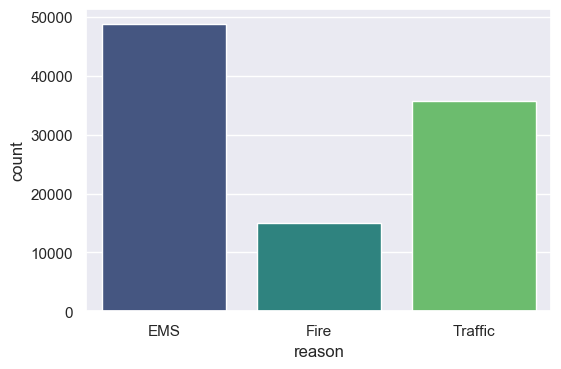

In [8]:
sns.set_style('darkgrid')
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})

sns.countplot(x = 'reason', data = df, palette = 'viridis')

____
Now let's begin to focus on time information. 

**What is the data type of the objects in the timeStamp column?**

In [9]:
# type(df['timeStamp']) ## nope, that's not how it's done
# df.info() ## not either
# df.dtypes ## also no
# df['timeStamp'].apply(type) ## this works (sort of), but there should be a better way

df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
reason        object
dtype: object

In [10]:
df['timeStamp'].dtypes # strings - see below :)

dtype('O')

Cool resource: [What is dtype('O'), in pandas?](https://stackoverflow.com/q/37561991/18507676)

- When you see `dtype('O')` inside a dataframe, it indicates Pandas string.

In [11]:
print(type(df['timeStamp'].iloc[0])) # Jose's solution - He just focused on 1 data entry.

print(df['timeStamp'].iloc[0])

<class 'str'>
2015-12-10 17:40:00


____
Let's now use [`pd.to_datetime`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.

In [12]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series DataFrame/dict-like
        The object to convert to a datetime.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaT.
        - If 'ignore', then invalid parsing will return the input.
    dayfirst : bool, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as
        2012-11-10.
        with day first (this is a known bug, based on dateutil behavior).
    yearfirst : bool, defaul

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

print(df['timeStamp'].dtype, '\n')

print(type(df['timeStamp'].iloc[0]))
print(df['timeStamp'].iloc[0])

datetime64[ns] 

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2015-12-10 17:40:00


____
We can now grab specific attributes from a Datetime object by calling them. For example:

    time = df['timeStamp'].iloc[0]
    time.hour

Now that the `timestamp` column are actually DateTime objects, use `.apply()` to create 3 new columns called Hour, Month, and Day of Week.

Some help from pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html):
#### Time/date components

There are several time/date properties that one can access from Timestamp or a collection of timestamps like a DatetimeIndex.

[Creating tables with Markdown](https://www.markdownguide.org/extended-syntax/)

| Property | Description |
| :----: | :----: |
| year | The year of the datetime |
| month | The month of the datetime |
| day | The days of the datetime |
| hour | The hour of the datetime |
| minute | The minutes of the datetime |
| second | The seconds of the datetime |
| microsecond | The microseconds of the datetime |
| nanosecond | The nanoseconds of the datetime |
| date | Returns datetime.date (does not contain timezone information) |
| time | Returns datetime.time (does not contain timezone information) |
| timetz | Returns datetime.time as local time with timezone information |
| dayofyear | The ordinal day of year |
| day_of_year | The ordinal day of year |
| weekofyear | The week ordinal of the year |
| week | The week ordinal of the year |
| dayofweek | The number of the day of the week with Monday=0, Sunday=6 |
| day_of_week | The number of the day of the week with Monday=0, Sunday=6 |
| weekday | The number of the day of the week with Monday=0, Sunday=6 |
| quarter | Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc. |
| days_in_month | The number of days in the month of the datetime |
| is_month_start | Logical indicating if first day of month (defined by frequency) |
| is_month_end | Logical indicating if last day of month (defined by frequency) |
| is_quarter_start | Logical indicating if first day of quarter (defined by frequency) |
| is_quarter_end | Logical indicating if last day of quarter (defined by frequency) |
| is_year_start | Logical indicating if first day of year (defined by frequency) |
| is_year_end | Logical indicating if last day of year (defined by frequency) |
| is_leap_year | Logical indicating if the date belongs to a leap year |

In [15]:
df['hour'] = df['timeStamp'].apply(lambda timeStamp : timeStamp.hour) # Jose: `(lambda time: time.hour)`
df['month'] = df['timeStamp'].apply(lambda timeStamp : timeStamp.month)
df['day_of_week'] = df['timeStamp'].apply(lambda timeStamp : timeStamp.dayofweek)

df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3


____
The Day of Week is an integer 0-6. Use the `.map()` with the dictionary given below to map the actual string names to the day of the week:

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['day_of_week'] = df['day_of_week'].map(dmap) # https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
df['day_of_week'].head(3)

0    Thu
1    Thu
2    Thu
Name: day_of_week, dtype: object

____
Now, let's use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

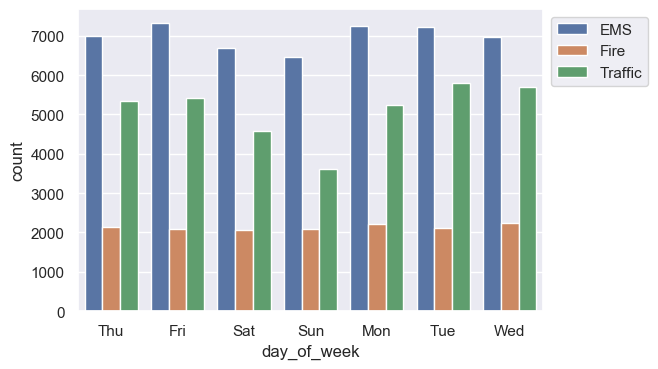

In [39]:
sns.countplot(x = 'day_of_week', data = df, hue = 'reason').legend(bbox_to_anchor = (1, 1))

# Jose: `plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)`

____
Now do the same for Month.

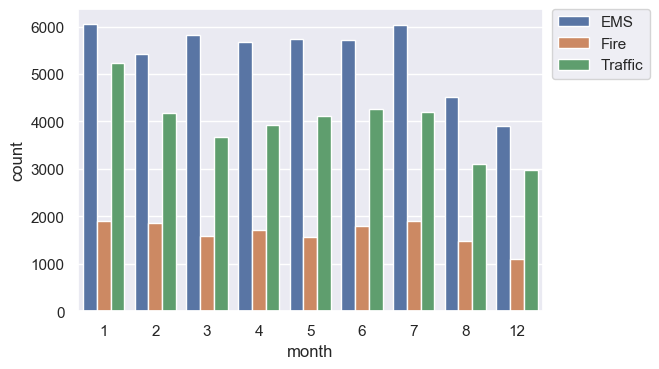

In [19]:
sns.countplot(x = 'month', data = df, hue = 'reason').legend(bbox_to_anchor=(1.02, 1), 
    loc='upper left', borderaxespad=0)

# Jose: `plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)`

____
We are missing some months in the plot, let's see if we can maybe fill in this information by plotting the information in another way - possibly with a simple line plot that fills in the missing months.

In order to do this, we'll need to do some more work with pandas. 

Let's create a `groupby` object called `byMonth`, where we'll group the DataFrame by the `month` column and use the `count()` method for aggregation.

In [20]:
byMonth = df.groupby('month').count()
byMonth.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day_of_week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101


Now, let's create a simple plot off of the dataframe indicating the count of calls per month.

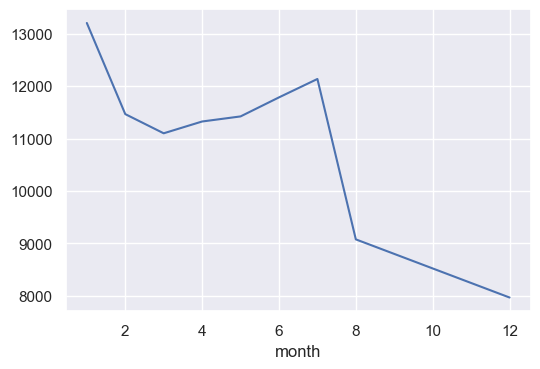

In [21]:
byMonth['lat'].plot() # Could be any column :)

____
Now, let's use seaborn's `lmplot()` to create a linear fit on the number of calls per month. 

Keep in mind we may need to reset the index to a column.

In [22]:
byMonth.reset_index('month', inplace = True) # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
byMonth.head(3)

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day_of_week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101


A quick note to myself:

[**We can**](https://www.delftstack.com/howto/seaborn/set-axis-labels-seaborn-python/):

- Use the `set_xlabel()` and `set_ylabel()` Functions to Set the Axis Labels in a Seaborn Plot
- Use the `set()` Function to Set the Axis Labels in a Seaborn Plot
- Use the `matplotlib.pyplot.xlabel()` and `matplotlib.pyplot.ylabel()` Functions to Set the Axis Labels of a Seaborn Plot

Text(-8.680555555555555, 0.5, 'Number of Calls')

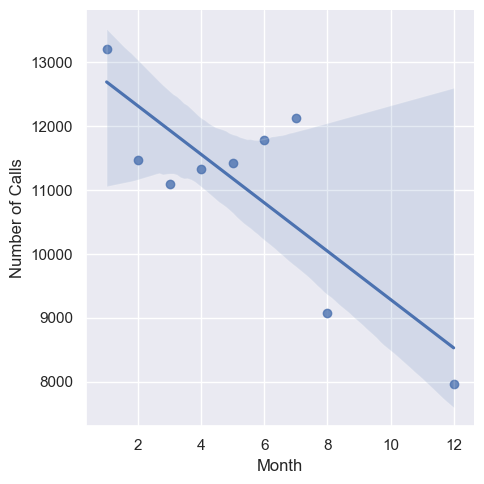

In [23]:
# My solution - resetting index in the cell above, and then:

plot = sns.lmplot(x = 'month', y = 'lat', data = byMonth)
plt.xlabel('Month')
plt.ylabel('Number of Calls')

# Jose' solution to this problem:
# sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

____
Create a new column called 'Date' that contains the date from the `timeStamp` column.

In [24]:
df['date'] = df['timeStamp'].apply(lambda timeStamp: timeStamp.date())
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


____
Now, we'll use `groupby` on this `date` column with the `count()` aggregate function and create a plot of counts of 911 calls.

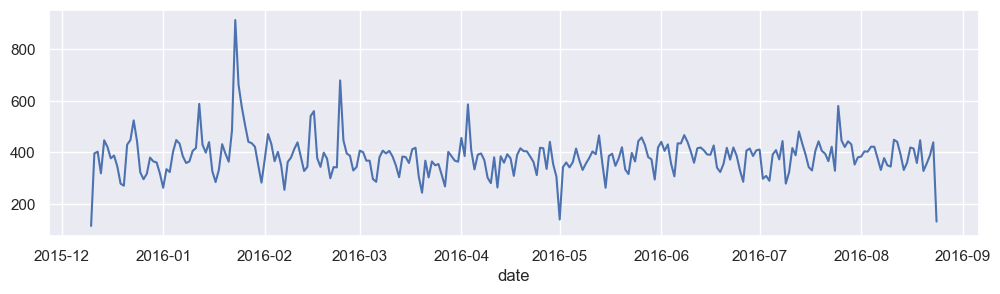

In [25]:
df.groupby('date').count()['lat'].plot(figsize = (12, 3))
# plt.tight_layout()

____
Now, let's recreate this plot but create 3 separate plots with each plot representing a reason for the 911 call.

In [26]:
df['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

Text(0.5, 1.0, 'EMS')

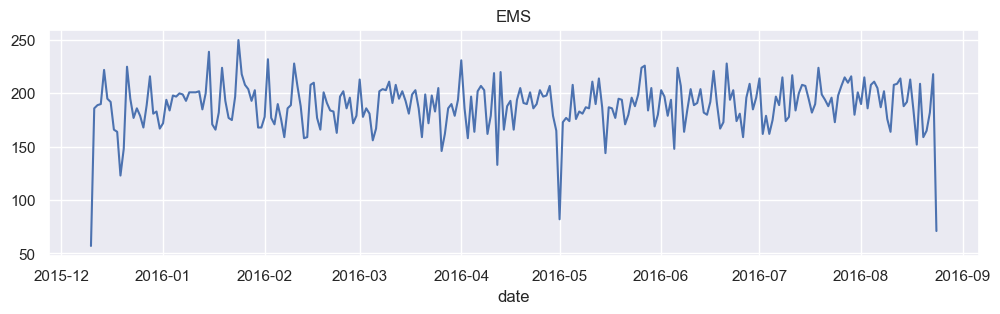

In [40]:
df[df['reason'] == 'EMS'].groupby('date').count()['lat'].plot(figsize = (12, 3))
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

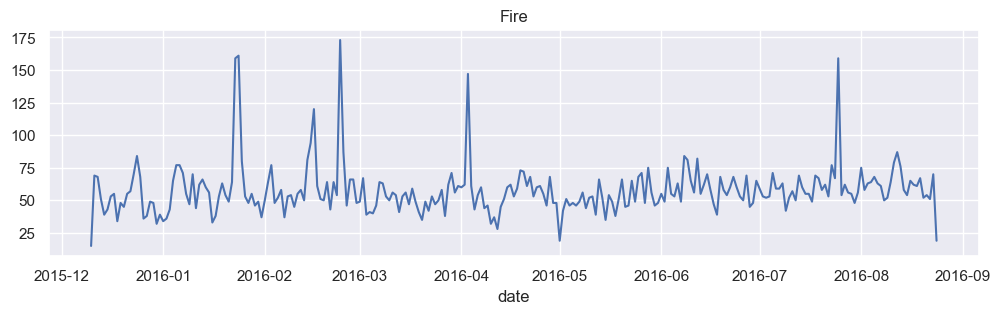

In [41]:
df[df['reason'] == 'Fire'].groupby('date').count()['lat'].plot(figsize = (12, 3))
plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

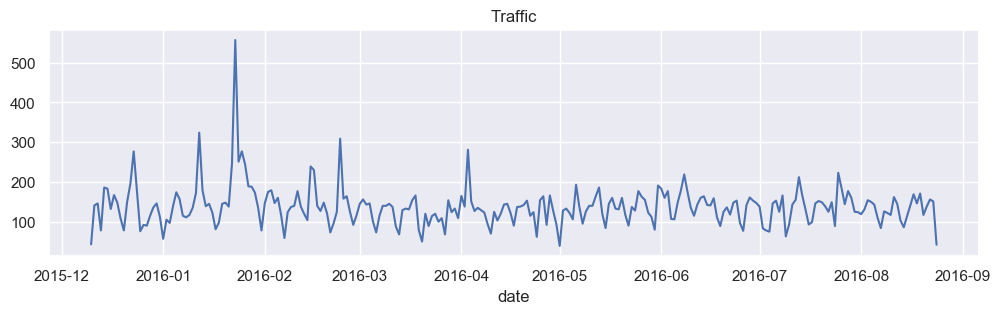

In [42]:
df[df['reason'] == 'Traffic'].groupby('date').count()['lat'].plot(figsize = (12, 3))
plt.title('Traffic')

____
Now let's move on to creating  heatmaps with seaborn and our data. 

We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

There are lots of ways to do this. For our purposes, let's try to combine `groupby` with an [`unstack`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) method.

In [30]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [31]:
df.groupby(['day_of_week', 'hour']).count().head(2) # step 1

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
day_of_week hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   

                  reason  month  date  
day_of_week hour                       
Fri         0        275    275   275  
            1        235    235   235

In [32]:
df.groupby(['day_of_week', 'hour']).count().unstack(level = 'hour').head() # step 2

lat                                               ... date       \
hour          0    1    2    3    4    5    6    7    8    9   ...   14   15   
day_of_week                                                    ...             
Fri          275  235  191  175  201  194  372  598  742  752  ...  932  980   
Mon          282  221  201  194  204  267  397  653  819  786  ...  869  913   
Sat          375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sun          383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thu          278  202  233  159  182  203  362  570  777  828  ...  876  969   

                                                       
hour           16    17   18   19   20   21   22   23  
day_of_week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  
Sun           663   714  670  655  537  461  415  330  
Thu           935  1013  810  698  617  553  424  354  

[5 rows x 288 columns]

In [44]:
heat_data = df.groupby(['day_of_week', 'hour'])['lat'].count().unstack(level = 'hour') # step 3 :)
heat_data.head()

# Jose - pretty much the same code:
# dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


____
Now let's create a HeatMap using this new DataFrame.

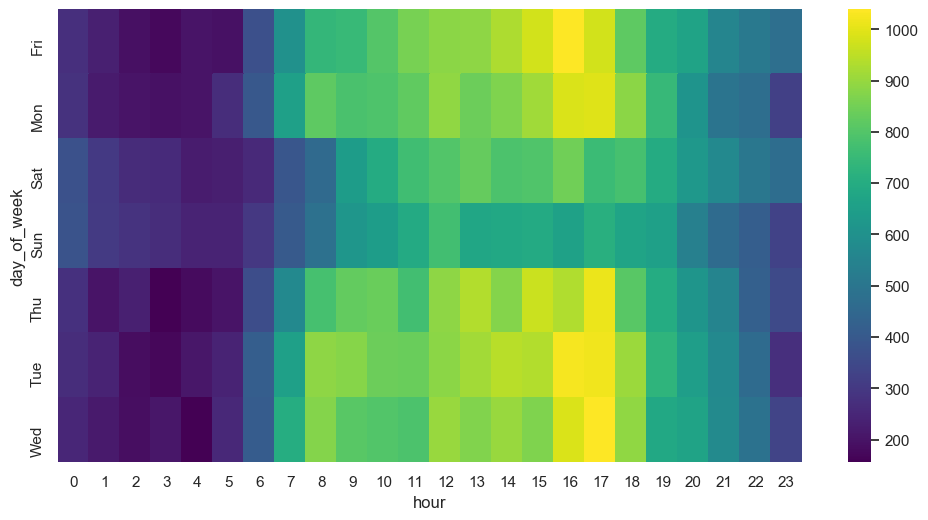

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(heat_data, cmap = 'viridis') # https://seaborn.pydata.org/tutorial/color_palettes.html

____
Let's create a clustermap using this DataFrame.

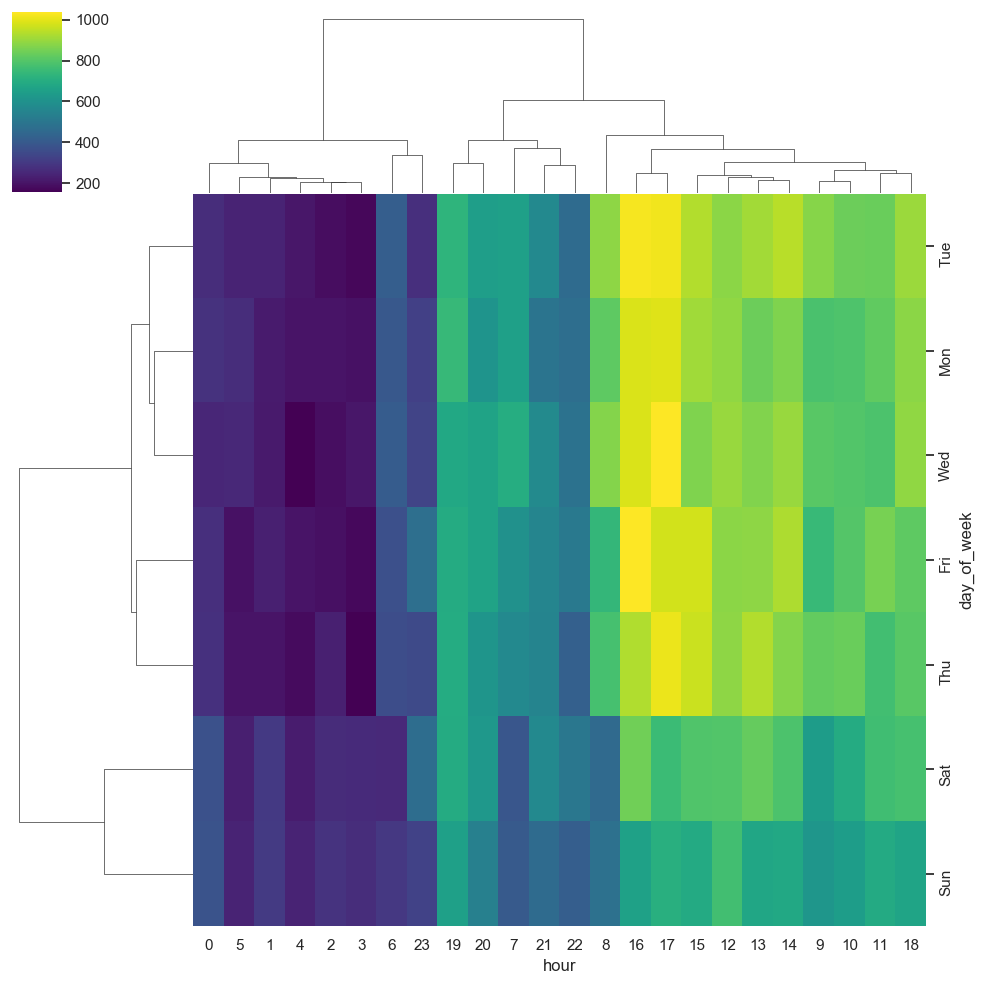

In [35]:
sns.clustermap(heat_data, cmap = 'viridis') # https://seaborn.pydata.org/tutorial/color_palettes.html

____
Now let's re-create these same plots and operations, for a DataFrame that shows the `month` as the column.

In [48]:
heat_data_month = df.groupby(['day_of_week', 'month'])['lat'].count().unstack(level = 'month')
heat_data_month.head()

# Jose - pretty much the same code:
# dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

month,1,2,3,4,5,6,7,8,12
day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


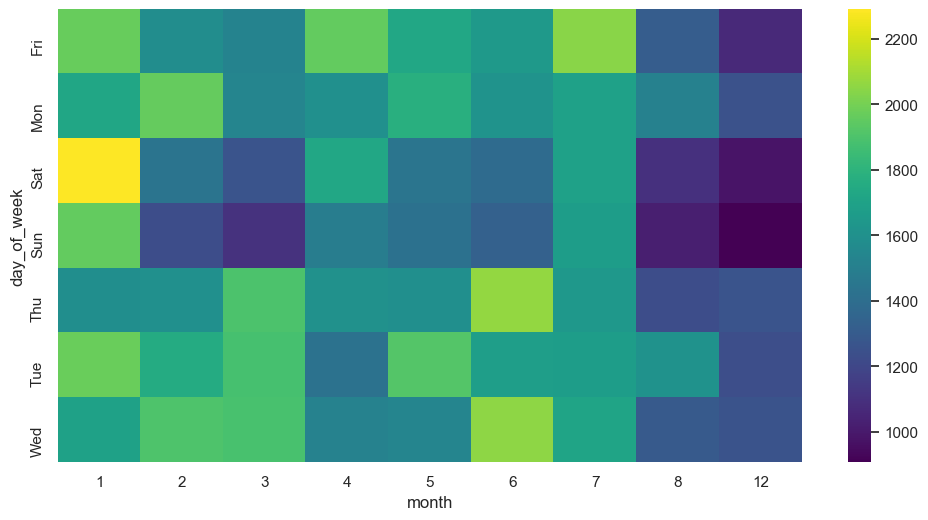

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(heat_data_month, cmap = 'viridis')

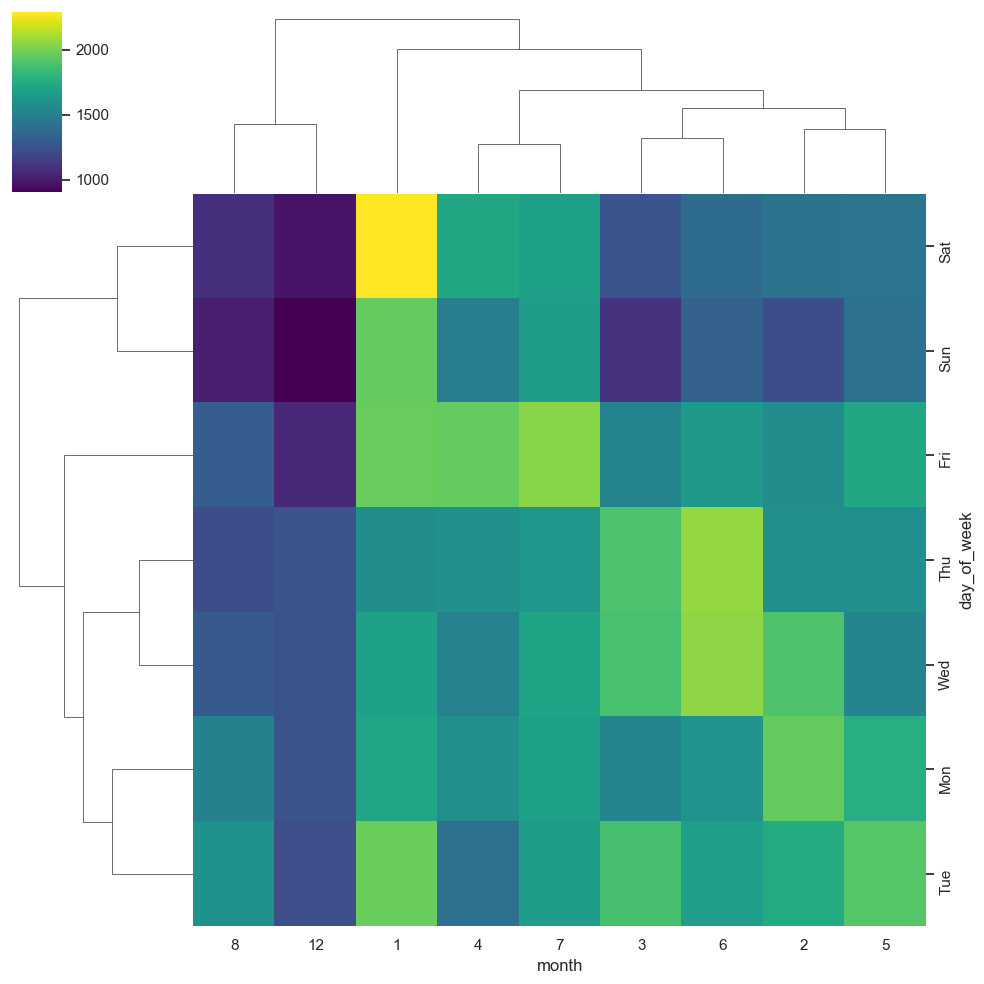

In [38]:
sns.clustermap(heat_data_month, cmap = 'viridis')